## prework

* load basic dependencies
* load data
* check data

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/glove-global-vectors-for-word-representation/glove.6B.50d.txt
/kaggle/input/glove-global-vectors-for-word-representation/glove.6B.100d.txt
/kaggle/input/glove-global-vectors-for-word-representation/glove.6B.200d.txt
/kaggle/input/nlp-getting-started/test.csv
/kaggle/input/nlp-getting-started/sample_submission.csv
/kaggle/input/nlp-getting-started/train.csv


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from tqdm import tqdm

In [3]:
# load data
tweet = pd.read_csv('/kaggle/input/nlp-getting-started/train.csv')
test = pd.read_csv('/kaggle/input/nlp-getting-started/test.csv')
submission = pd.read_csv('/kaggle/input/nlp-getting-started/sample_submission.csv')
tweet.shape, test.shape, submission.shape

((7613, 5), (3263, 4), (3263, 2))

In [4]:
# check data
def show_info(data, is_matrix_transpose=False):
    print('\n' * 2)
    # basic shape
    print('data shape is: {}   sample number {}   attribute number {}\n'.format(data.shape, data.shape[0], data.shape[1]))
    # attribute(key)
    print('data columns number {}  \nall columns: {}\n'.format(len(data.columns) ,data.columns))
    # value's null
#     print('data all attribute count null:\n', data.isna().sum())
    # data value analysis and data demo
#     if is_matrix_transpose:
#         print('data value analysis: ', data.describe().T)
#         print('data demo without matrix transpose: ', data.head().T)
#     else:
#         print('data value analysis: ', data.describe())
#         print('data demo without matrix transpose: ', data.head())
show_info(tweet)
show_info(test)
show_info(submission)




data shape is: (7613, 5)   sample number 7613   attribute number 5

data columns number 5  
all columns: Index(['id', 'keyword', 'location', 'text', 'target'], dtype='object')




data shape is: (3263, 4)   sample number 3263   attribute number 4

data columns number 4  
all columns: Index(['id', 'keyword', 'location', 'text'], dtype='object')




data shape is: (3263, 2)   sample number 3263   attribute number 2

data columns number 2  
all columns: Index(['id', 'target'], dtype='object')



## EDA


### plot

* label
    * classification
* value
    * length of per words
    * number of words in per text
    * average of words in per text

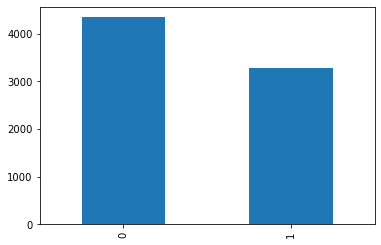

In [5]:
# plot -> label -> classification
tweet.target.value_counts().plot.bar()

In [6]:
# 增添长度属性到 true and not ==> 利用apply 来应用
def length(text):
    return len(text)
# new attribute 'length' in train 
tweet['length'] = tweet['text'].apply(length)
show_info(tweet)




data shape is: (7613, 6)   sample number 7613   attribute number 6

data columns number 6  
all columns: Index(['id', 'keyword', 'location', 'text', 'target', 'length'], dtype='object')



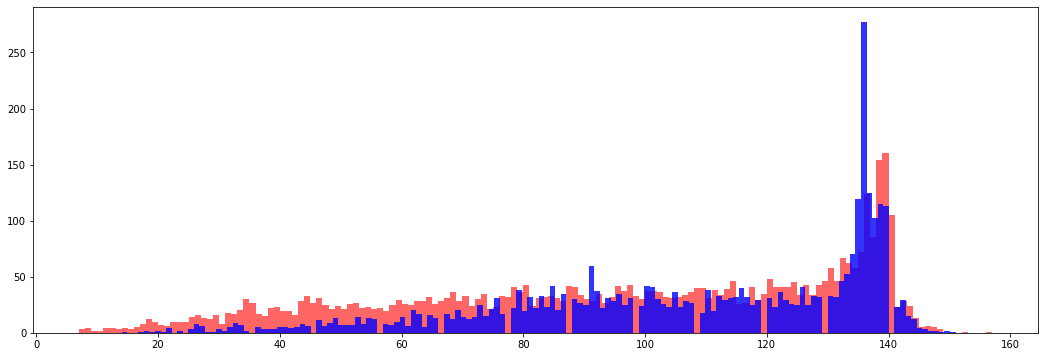

In [7]:
# plot -> value -> length
plt.rcParams['figure.figsize'] = (18.0, 6.0)
bins = 150
plt.hist(tweet[tweet['target'] == 0]['length'], alpha=0.6, bins=bins, label='Not', color='red')
plt.hist(tweet[tweet['target'] == 1]['length'], alpha=0.8, bins=bins, label='Real', color='blue')
plt.show()

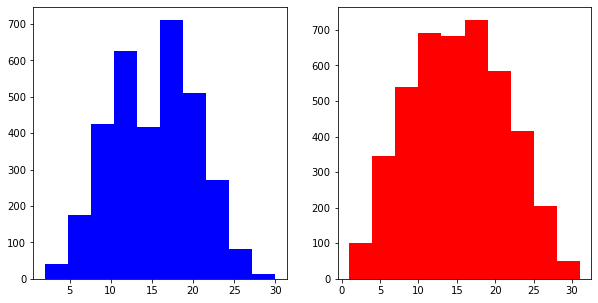

In [8]:
# number of words
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
tweet_len = tweet[tweet['target'] == 1]['text'].str.split().map(lambda x: len(x))
ax1.hist(tweet_len, color='blue')
tweet_len = tweet[tweet['target'] == 0]['text'].str.split().map(lambda x: len(x))
ax2.hist(tweet_len, color='red')
plt.show()

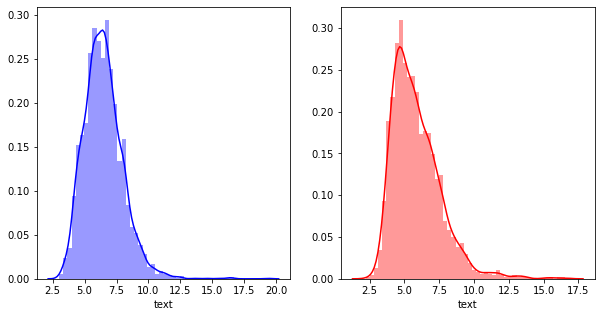

In [9]:
# average length in a text
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
word = tweet[tweet['target'] == 1]['text'].str.split().apply(lambda x: [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)), ax=ax1, color='blue')
word = tweet[tweet['target'] == 0]['text'].str.split().apply(lambda x: [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)), ax=ax2, color='red')

## Data preprocessing

* init corpus (split by 0 and 1)
* *common stopwords* in tweets (use ntlk's corpus to get stopwords)
* *punctuation* in tweets (use string to get punctuation)
* *common word* in tweets (use Counter in collections)
* *N-gram* analysis => get relationship between different gram


In [10]:
from nltk.corpus import stopwords
# set english
stop = set(stopwords.words('english'))
from nltk.tokenize import word_tokenize
from collections import defaultdict, Counter
import string
from sklearn.feature_extraction.text import CountVectorizer

In [11]:
# create corpus to get only corpus
def create_corpus(target):
    corpus = []
    
    for x in tweet[tweet['target']==target]['text'].str.split():
        for i in x:
            corpus.append(i)
    return corpus

def create_corpus_df(tweet, target):
    corpus = []
    for x in tweet[tweet['target']==target]['text'].str.split():
        for i in x:
            corpus.append(i)
    return corpus

<BarContainer object of 10 artists>

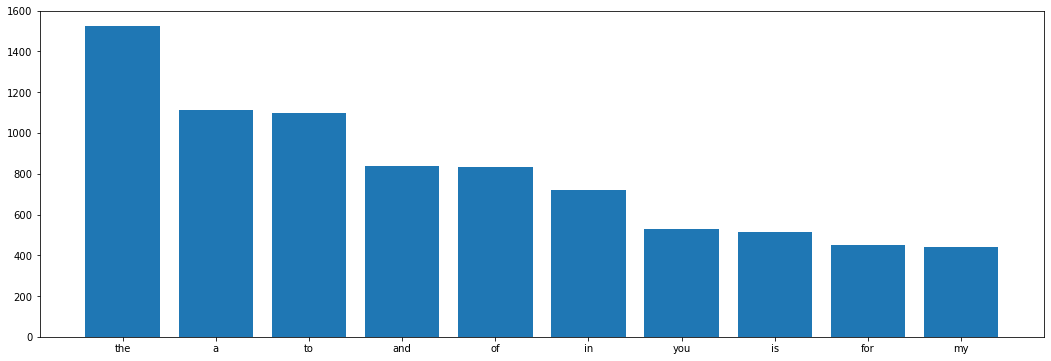

In [12]:
# create corpus 0 => not
corpus = create_corpus(0)
dic = defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word] += 1

top = sorted(dic.items(), key=lambda x: x[1], reverse=True)[:10]

# then plot stop words 
plt.rcParams['figure.figsize'] = (18.0, 6.0)
x, y = zip(*top)
plt.bar(x, y)

<BarContainer object of 10 artists>

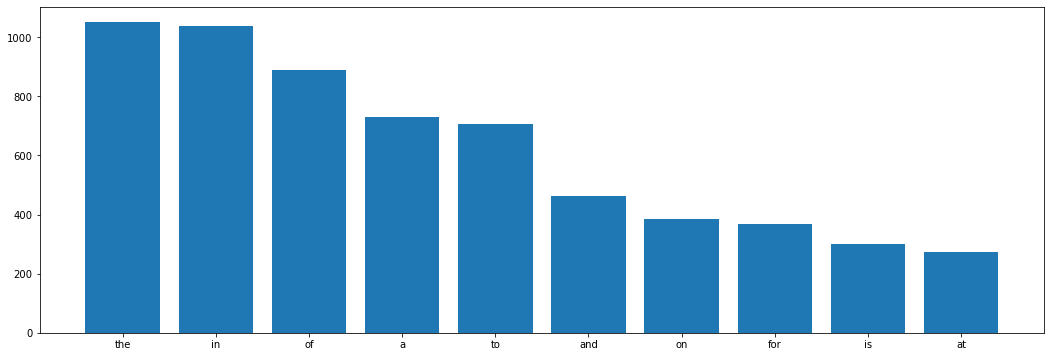

In [13]:
# create corpus 1 => real
corpus = create_corpus(1)

dic = defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word] += 1

top = sorted(dic.items(), key=lambda x: x[1], reverse=True)[:10]

plt.rcParams['figure.figsize'] = (18.0, 6.0)
x, y = zip(*top)
plt.bar(x, y)

<BarContainer object of 20 artists>

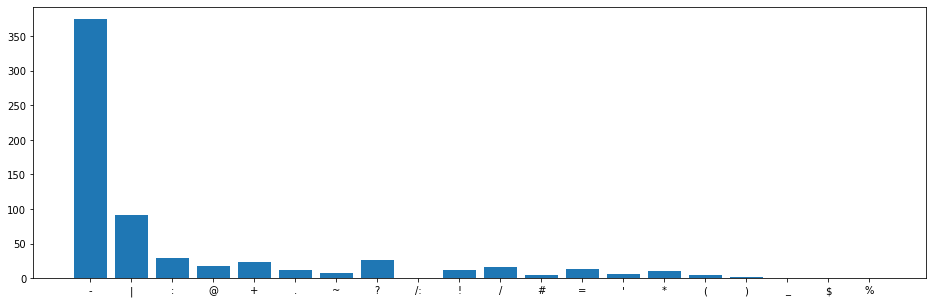

In [14]:
# punctuation 0 => not
plt.figure(figsize=(16, 5))
corpus = create_corpus(0)
dic = defaultdict(int)
special = string.punctuation
for i in (corpus):
    if i in special:
        dic[i] += 1
x, y = zip(*dic.items())
plt.bar(x, y)

<BarContainer object of 18 artists>

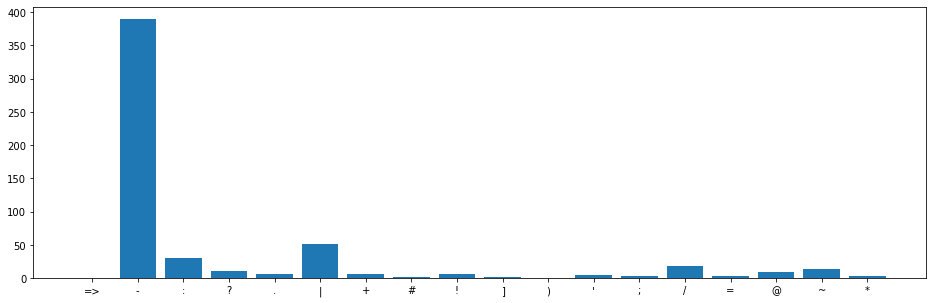

In [15]:
# punctuation 1 => Real
plt.figure(figsize=(16, 5))
corpus = create_corpus(1)
dic = defaultdict(int)
special = string.punctuation
for i in (corpus):
    if i in special:
        dic[i] += 1

x, y = zip(*dic.items())
plt.bar(x, y)

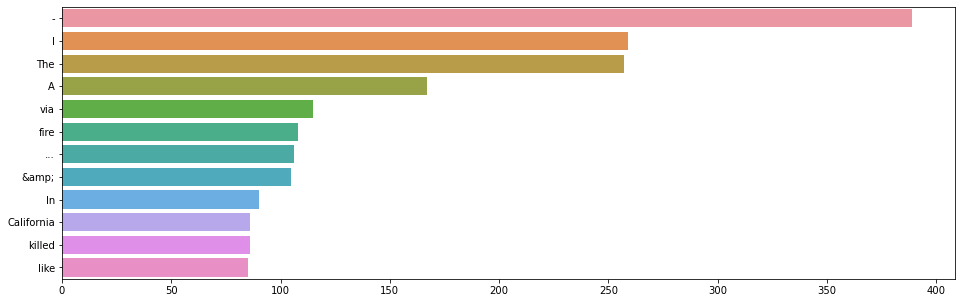

In [16]:
# common words
plt.figure(figsize=(16, 5))
counter = Counter(corpus)
most = counter.most_common()
x = []
y = []
for word, count in most[:40]:
    if (word not in stop):
        x.append(word)
        y.append(count)
sns.barplot(x=y, y=x)

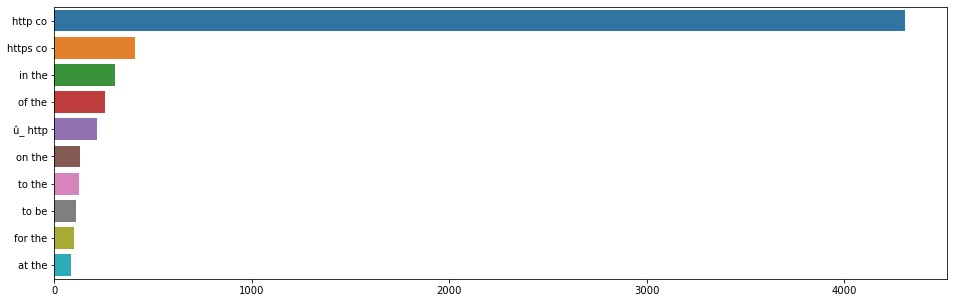

In [17]:
# N-gram analysis 多变量分析
def get_top_tweet_bigrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

plt.figure(figsize=(16, 5))
top_tweet_bigrams = get_top_tweet_bigrams(tweet['text'])[:10]
x, y = map(list, zip(*top_tweet_bigrams))
sns.barplot(x=y, y=x)

## Data cleaning

* concat
* remove
    * url
    * html tag
    * emojis
    * punctuations

In [18]:
import re

In [19]:
# concat
df = pd.concat([tweet, test])
df.shape

(10876, 6)

In [20]:
# method
def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'', text)
def remove_html(text):
    html = re.compile(r'<.*?>')
    return html.sub(r'', text)
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)
def remove_punct(text):
    table = str.maketrans('', '', string.punctuation)
    return text.translate(table)

# use apply to remove
df['text'] = df['text'].apply(lambda x: remove_URL(x))
df['text'] = df['text'].apply(lambda x: remove_html(x))
df['text'] = df['text'].apply(lambda x: remove_emoji(x))
df['text'] = df['text'].apply(lambda x: remove_punct(x))

### Word Cloud (EDA)

In [21]:
from wordcloud import WordCloud

In [22]:
corpus_new1 = create_corpus_df(df, 1)
len(corpus_new1)

46269

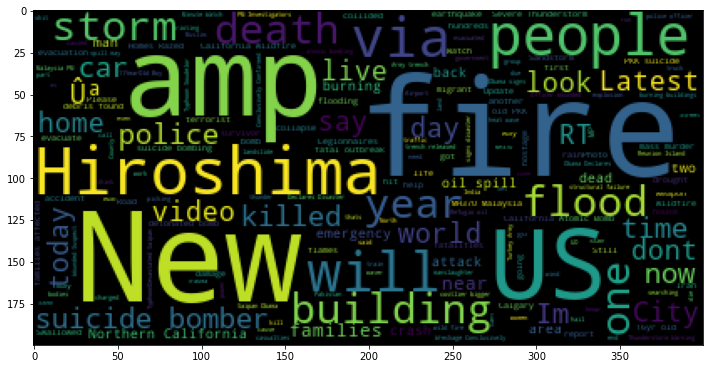

In [23]:
plt.figure(figsize=(12, 8))
word_cloud = WordCloud(
    background_color='black',
    max_font_size=80
).generate(' '.join(corpus_new1))
plt.imshow(word_cloud)
plt.show()

In [24]:
corpus_new0 = create_corpus_df(df, 0)
len(corpus_new0)

60478

## Model


### prework
* model prework 
* train test split

### embedding [use some ways to extract features]
* build
* visualize
* use tf-idf ==> get word vec
* use GloVe to embedding => 全局的，固定词典
    * base model based on GloVe
    * train test split


In [25]:
from sklearn.model_selection import train_test_split

# embedding => use following some ways to extract features
from sklearn.decomposition import PCA, TruncatedSVD

import matplotlib

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [26]:
def cv(data):
    count_vectorizer = CountVectorizer()

    emb = count_vectorizer.fit_transform(data)

    return emb, count_vectorizer

list_corpus = df["text"].tolist()
list_labels = df["target"].tolist()

X_train, X_test, y_train, y_test = train_test_split(list_corpus, list_labels, test_size=0.2, 
                                                                                random_state=2)

X_train_counts, count_vectorizer = cv(X_train)
X_test_counts = count_vectorizer.transform(X_test)

In [27]:
# visual embedding
# def plot_LSA(test_data, test_labels, savepath='PCA_demo.csv', plot=True):
#     # latent sematic analysis 隐形语义分析 => 进行奇异值分解之后得到的左边的就是词向量
#     lsa = TruncatedSVD(n_components=2)
#     lsa.fit(test_data)
#     lsa_scores = lsa.transform(test_data)
#     color_mapper = {
#         label: idx for idx, label in enumerate(set(test_labels))
#     }
#     color_column = [color_mapper[label] for label in test_labels]
#     colors = ['orange', 'blue']
#     if plot:
#         plt.scatter(lsa_scores[:, 0], lsa_scores[:, 1], s=8, alpha=.8, c=test_labels, cmap=matplotlib.colors.ListedColormap(colors))
#         orange_patch = mpatches.Patch(color='orange', label='Not')
#         blue_patch = mpatches.Patch(color='blue', label='Real')
#         plt.legend(handles=[orange_patch, blue_patch], prop={'size': 30})
def plot_LSA(test_data, test_labels, savepath="PCA_demo.csv", plot=True):
    lsa = TruncatedSVD(n_components=2)
    lsa.fit(test_data)
    lsa_scores = lsa.transform(test_data)
    color_mapper = {label:idx for idx,label in enumerate(set(test_labels))}
    color_column = [color_mapper[label] for label in test_labels]
    colors = ['orange','blue']
    if plot:
        plt.scatter(lsa_scores[:,0], lsa_scores[:,1], s=8, alpha=.8, c=test_labels, cmap=matplotlib.colors.ListedColormap(colors))
        orange_patch = mpatches.Patch(color='orange', label='Not')
        blue_patch = mpatches.Patch(color='blue', label='Real')
        plt.legend(handles=[orange_patch, blue_patch], prop={'size': 30})


fig = plt.figure(figsize=(16, 16))
# plot_LSA(X_train_counts, y_train)
plt.show()

<Figure size 1152x1152 with 0 Axes>

In [28]:
def tfidf(data):
    tfidf_vectorizer = TfidfVectorizer()
    train = tfidf_vectorizer.fit_transform(data)
    return train, tfidf_vectorizer

X_train_tfidf, tfidf_vectorizer = tfidf(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

fig = plt.figure(figsize=(16, 16))
# plot_LSA(X_train_tfidf, y_train)
plt.show()

<Figure size 1152x1152 with 0 Axes>

In [29]:
# GloVe => have three dim(50d, 100d, 200d) => then use 100d here
# first to create **lowercase only** corpus
def create_corpus_new(df):
    corpus = []
    for tweet in tqdm(df['text']):
        words = [word.lower() for word in word_tokenize(tweet)]
        corpus.append(words)
    return corpus
corpus = create_corpus_new(df)

100%|██████████| 10876/10876 [00:02<00:00, 4646.35it/s]


In [30]:
embedding_dict = {}
# get glove 100b txt 
with open('../input/glove-global-vectors-for-word-representation/glove.6B.100d.txt', 'r') as f:
    for line in f:
        values = line.split()
        word = values[0]
        vectors = np.asarray(values[1:], 'float32')
        embedding_dict[word] = vectors
f.close()

In [31]:
MAX_LEN = 50
tokenizer_obj = Tokenizer()
tokenizer_obj.fit_on_texts(corpus)
sequences = tokenizer_obj.texts_to_sequences(corpus)

tweet_pad = pad_sequences(sequences, maxlen=MAX_LEN, truncating='post', padding='post')

word_index = tokenizer_obj.word_index
print('Number of unique words: ', len(word_index))

Number of unique words:  22807


In [32]:
num_words = len(word_index)+1
embedding_matrix = np.zeros((num_words, 100))
for word, i in tqdm(word_index.items()):
    if i < num_words:
        emb_vec = embedding_dict.get(word)
        if emb_vec is not None:
            embedding_matrix[i] = emb_vec

100%|██████████| 22807/22807 [00:00<00:00, 352974.03it/s]


In [33]:
# model dependencies
from keras.models import Model, Sequential
from keras.layers import Embedding, SpatialDropout1D, LSTM, Dense
from keras.optimizers import Adam
from keras.initializers import Constant

# train test split
from sklearn.model_selection import train_test_split

In [34]:
model = Sequential()

model.add(Embedding(num_words, 100, embeddings_initializer=Constant(embedding_matrix), input_length=MAX_LEN, trainable=False))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

optimizer = Adam(learning_rate=3e-4)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 50, 100)           2280800   
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 50, 100)           0         
_________________________________________________________________
lstm (LSTM)                  (None, 100)               80400     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 2,361,301
Trainable params: 80,501
Non-trainable params: 2,280,800
_________________________________________________________________


In [35]:
# extract valid content
train = tweet_pad[:tweet.shape[0]]
test = tweet_pad[:tweet.shape[0]:]
# then train test split
X_train, X_test, y_train, y_test = train_test_split(train, tweet['target'].values, test_size=0.2)
X_train.shape, X_test.shape

((6090, 50), (1523, 50))

In [36]:
# test plot
# fig = plot_LSA(train, tweet['target'])
plt.show()

In [37]:
# fit
history = model.fit(X_train, y_train, batch_size=4, epochs=10, validation_data=(X_test, y_test), verbose=2)

Epoch 1/10
1523/1523 - 274s - loss: 0.5257 - accuracy: 0.7488 - val_loss: 0.4765 - val_accuracy: 0.7846
Epoch 2/10
1523/1523 - 273s - loss: 0.4789 - accuracy: 0.7842 - val_loss: 0.4976 - val_accuracy: 0.7912
Epoch 3/10
1523/1523 - 273s - loss: 0.4782 - accuracy: 0.7865 - val_loss: 0.4898 - val_accuracy: 0.7840
Epoch 4/10
1523/1523 - 278s - loss: 0.4694 - accuracy: 0.7903 - val_loss: 0.4626 - val_accuracy: 0.7925
Epoch 5/10
1523/1523 - 281s - loss: 0.4638 - accuracy: 0.7885 - val_loss: 0.4579 - val_accuracy: 0.7866
Epoch 6/10
1523/1523 - 273s - loss: 0.4536 - accuracy: 0.7947 - val_loss: 0.4594 - val_accuracy: 0.7932
Epoch 7/10
1523/1523 - 274s - loss: 0.4496 - accuracy: 0.7984 - val_loss: 0.4667 - val_accuracy: 0.7899
Epoch 8/10
1523/1523 - 274s - loss: 0.4402 - accuracy: 0.8018 - val_loss: 0.4534 - val_accuracy: 0.7971
Epoch 9/10
1523/1523 - 275s - loss: 0.4333 - accuracy: 0.8090 - val_loss: 0.4642 - val_accuracy: 0.8089
Epoch 10/10
1523/1523 - 271s - loss: 0.4244 - accuracy: 0.8136 -

In [38]:
# predict
train_pred_GloVe = model.predict(train)
train_pred_GloVe_int = train_pred_GloVe.round().astype('int')
test_pred_GloVe = model.predict(test)
test_pred_GloVe_int = test_pred_GloVe.round().astype('int')
# len(test), len(test_pred_GloVe), len(test_pred_GloVe_int)

## bert model (using TFHub)

* download tokenization.py
* load dependencies

In [39]:
# get file => tokenization.py
!wget --quiet https://raw.githubusercontent.com/tensorflow/models/master/official/nlp/bert/tokenization.py

In [40]:
# submission['target'] = test_pred_GloVe_int
# submission.head()
import tensorflow as tf
from keras.layers import Input
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
import tensorflow_hub as hub

import tokenization

In [41]:
def bert_encode(texts, tokenizer, max_len=512):
    
    all_tokens = []
    all_masks = []
    all_segments = []
    
    for text in texts:
        text = tokenizer.tokenize(text)
            
        text = text[:max_len-2]
        input_sequence = ["[CLS]"] + text + ["[SEP]"]
        pad_len = max_len - len(input_sequence)
        
        tokens = tokenizer.convert_tokens_to_ids(input_sequence)
        tokens += [0] * pad_len
        pad_masks = [1] * len(input_sequence) + [0] * pad_len
        segment_ids = [0] * max_len
        
        all_tokens.append(tokens)
        all_masks.append(pad_masks)
        all_segments.append(segment_ids)
    
    return np.array(all_tokens), np.array(all_masks), np.array(all_segments)

In [42]:
# bert build model
def build_model(bert_layer, max_len=512):
    input_word_ids = Input(shape=(max_len,), dtype=tf.int32, name="input_word_ids")
    input_mask = Input(shape=(max_len,), dtype=tf.int32, name="input_mask")
    segment_ids = Input(shape=(max_len,), dtype=tf.int32, name="segment_ids")

    _, sequence_output = bert_layer([input_word_ids, input_mask, segment_ids])
    clf_output = sequence_output[:, 0, :]
    
    if Dropout_num == 0:
        # Without Dropout
        out = Dense(1, activation='sigmoid')(clf_output)
    else:
        # With Dropout(Dropout_num), Dropout_num > 0
        x = Dropout(Dropout_num)(clf_output)
        out = Dense(1, activation='sigmoid')(x)

    model = Model(inputs=[input_word_ids, input_mask, segment_ids], outputs=out)
    model.compile(Adam(lr=learning_rate), loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

In [43]:
# data cleaning for bert model data format
def clean_tweets(tweet):
    tweet = ''.join([x for x in tweet if x in string.printable])
    # remove url
    tweet = re.sub(r'http\S+', '', tweet)
    return tweet

def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

def remove_punctuations(text):
    punctuations = '@#!?+&*[]-%.:/();$=><|{}^' + "'`"
    
    for p in punctuations:
        text = text.replace(p, f' {p} ')

    text = text.replace('...', ' ... ')
    
    if '...' not in text:
        text = text.replace('..', ' ... ')
    
    return text

abbreviations = {
    "$" : " dollar ",
    "€" : " euro ",
    "4ao" : "for adults only",
    "a.m" : "before midday",
    "a3" : "anytime anywhere anyplace",
    "aamof" : "as a matter of fact",
    "acct" : "account",
    "adih" : "another day in hell",
    "afaic" : "as far as i am concerned",
    "afaict" : "as far as i can tell",
    "afaik" : "as far as i know",
    "afair" : "as far as i remember",
    "afk" : "away from keyboard",
    "app" : "application",
    "approx" : "approximately",
    "apps" : "applications",
    "asap" : "as soon as possible",
    "asl" : "age, sex, location",
    "atk" : "at the keyboard",
    "ave." : "avenue",
    "aymm" : "are you my mother",
    "ayor" : "at your own risk", 
    "b&b" : "bed and breakfast",
    "b+b" : "bed and breakfast",
    "b.c" : "before christ",
    "b2b" : "business to business",
    "b2c" : "business to customer",
    "b4" : "before",
    "b4n" : "bye for now",
    "b@u" : "back at you",
    "bae" : "before anyone else",
    "bak" : "back at keyboard",
    "bbbg" : "bye bye be good",
    "bbc" : "british broadcasting corporation",
    "bbias" : "be back in a second",
    "bbl" : "be back later",
    "bbs" : "be back soon",
    "be4" : "before",
    "bfn" : "bye for now",
    "blvd" : "boulevard",
    "bout" : "about",
    "brb" : "be right back",
    "bros" : "brothers",
    "brt" : "be right there",
    "bsaaw" : "big smile and a wink",
    "btw" : "by the way",
    "bwl" : "bursting with laughter",
    "c/o" : "care of",
    "cet" : "central european time",
    "cf" : "compare",
    "cia" : "central intelligence agency",
    "csl" : "can not stop laughing",
    "cu" : "see you",
    "cul8r" : "see you later",
    "cv" : "curriculum vitae",
    "cwot" : "complete waste of time",
    "cya" : "see you",
    "cyt" : "see you tomorrow",
    "dae" : "does anyone else",
    "dbmib" : "do not bother me i am busy",
    "diy" : "do it yourself",
    "dm" : "direct message",
    "dwh" : "during work hours",
    "e123" : "easy as one two three",
    "eet" : "eastern european time",
    "eg" : "example",
    "embm" : "early morning business meeting",
    "encl" : "enclosed",
    "encl." : "enclosed",
    "etc" : "and so on",
    "faq" : "frequently asked questions",
    "fawc" : "for anyone who cares",
    "fb" : "facebook",
    "fc" : "fingers crossed",
    "fig" : "figure",
    "fimh" : "forever in my heart", 
    "ft." : "feet",
    "ft" : "featuring",
    "ftl" : "for the loss",
    "ftw" : "for the win",
    "fwiw" : "for what it is worth",
    "fyi" : "for your information",
    "g9" : "genius",
    "gahoy" : "get a hold of yourself",
    "gal" : "get a life",
    "gcse" : "general certificate of secondary education",
    "gfn" : "gone for now",
    "gg" : "good game",
    "gl" : "good luck",
    "glhf" : "good luck have fun",
    "gmt" : "greenwich mean time",
    "gmta" : "great minds think alike",
    "gn" : "good night",
    "g.o.a.t" : "greatest of all time",
    "goat" : "greatest of all time",
    "goi" : "get over it",
    "gps" : "global positioning system",
    "gr8" : "great",
    "gratz" : "congratulations",
    "gyal" : "girl",
    "h&c" : "hot and cold",
    "hp" : "horsepower",
    "hr" : "hour",
    "hrh" : "his royal highness",
    "ht" : "height",
    "ibrb" : "i will be right back",
    "ic" : "i see",
    "icq" : "i seek you",
    "icymi" : "in case you missed it",
    "idc" : "i do not care",
    "idgadf" : "i do not give a damn fuck",
    "idgaf" : "i do not give a fuck",
    "idk" : "i do not know",
    "ie" : "that is",
    "i.e" : "that is",
    "ifyp" : "i feel your pain",
    "IG" : "instagram",
    "iirc" : "if i remember correctly",
    "ilu" : "i love you",
    "ily" : "i love you",
    "imho" : "in my humble opinion",
    "imo" : "in my opinion",
    "imu" : "i miss you",
    "iow" : "in other words",
    "irl" : "in real life",
    "j4f" : "just for fun",
    "jic" : "just in case",
    "jk" : "just kidding",
    "jsyk" : "just so you know",
    "l8r" : "later",
    "lb" : "pound",
    "lbs" : "pounds",
    "ldr" : "long distance relationship",
    "lmao" : "laugh my ass off",
    "lmfao" : "laugh my fucking ass off",
    "lol" : "laughing out loud",
    "ltd" : "limited",
    "ltns" : "long time no see",
    "m8" : "mate",
    "mf" : "motherfucker",
    "mfs" : "motherfuckers",
    "mfw" : "my face when",
    "mofo" : "motherfucker",
    "mph" : "miles per hour",
    "mr" : "mister",
    "mrw" : "my reaction when",
    "ms" : "miss",
    "mte" : "my thoughts exactly",
    "nagi" : "not a good idea",
    "nbc" : "national broadcasting company",
    "nbd" : "not big deal",
    "nfs" : "not for sale",
    "ngl" : "not going to lie",
    "nhs" : "national health service",
    "nrn" : "no reply necessary",
    "nsfl" : "not safe for life",
    "nsfw" : "not safe for work",
    "nth" : "nice to have",
    "nvr" : "never",
    "nyc" : "new york city",
    "oc" : "original content",
    "og" : "original",
    "ohp" : "overhead projector",
    "oic" : "oh i see",
    "omdb" : "over my dead body",
    "omg" : "oh my god",
    "omw" : "on my way",
    "p.a" : "per annum",
    "p.m" : "after midday",
    "pm" : "prime minister",
    "poc" : "people of color",
    "pov" : "point of view",
    "pp" : "pages",
    "ppl" : "people",
    "prw" : "parents are watching",
    "ps" : "postscript",
    "pt" : "point",
    "ptb" : "please text back",
    "pto" : "please turn over",
    "qpsa" : "what happens", #"que pasa",
    "ratchet" : "rude",
    "rbtl" : "read between the lines",
    "rlrt" : "real life retweet", 
    "rofl" : "rolling on the floor laughing",
    "roflol" : "rolling on the floor laughing out loud",
    "rotflmao" : "rolling on the floor laughing my ass off",
    "rt" : "retweet",
    "ruok" : "are you ok",
    "sfw" : "safe for work",
    "sk8" : "skate",
    "smh" : "shake my head",
    "sq" : "square",
    "srsly" : "seriously", 
    "ssdd" : "same stuff different day",
    "tbh" : "to be honest",
    "tbs" : "tablespooful",
    "tbsp" : "tablespooful",
    "tfw" : "that feeling when",
    "thks" : "thank you",
    "tho" : "though",
    "thx" : "thank you",
    "tia" : "thanks in advance",
    "til" : "today i learned",
    "tl;dr" : "too long i did not read",
    "tldr" : "too long i did not read",
    "tmb" : "tweet me back",
    "tntl" : "trying not to laugh",
    "ttyl" : "talk to you later",
    "u" : "you",
    "u2" : "you too",
    "u4e" : "yours for ever",
    "utc" : "coordinated universal time",
    "w/" : "with",
    "w/o" : "without",
    "w8" : "wait",
    "wassup" : "what is up",
    "wb" : "welcome back",
    "wtf" : "what the fuck",
    "wtg" : "way to go",
    "wtpa" : "where the party at",
    "wuf" : "where are you from",
    "wuzup" : "what is up",
    "wywh" : "wish you were here",
    "yd" : "yard",
    "ygtr" : "you got that right",
    "ynk" : "you never know",
    "zzz" : "sleeping bored and tired"
}

In [44]:
def convert_abbrev(word):
    return abbreviations[word.lower()] if word.lower() in abbreviations.keys() else word

In [45]:
def convert_abbrev_in_text(text):
    tokens = word_tokenize(text)
    tokens = [convert_abbrev(word) for word in tokens]
    text = ' '.join(tokens)
    return text

In [46]:
# load bert from tensorflow hub
# => use keras to save as a layer
module_url = 'https://tfhub.dev/tensorflow/bert_en_uncased_L-24_H-1024_A-16/1'
bert_layer = hub.KerasLayer(module_url, trainable=True)

In [47]:
# load data
train = pd.read_csv('/kaggle/input/nlp-getting-started/train.csv')
test = pd.read_csv('/kaggle/input/nlp-getting-started/test.csv')

In [48]:
# target correction
target_corrected = False
target_big_corrected = False
if target_corrected:
    ids_with_target_error = [328,443,513,2619,3640,3900,4342,5781,6552,6554,6570,6701,6702,6729,6861,7226]
    train.loc[train['id'].isin(ids_with_target_error),'target'] = 0
    train[train['id'].isin(ids_with_target_error)]
if target_big_corrected:
    train['text'] = train['text'].apply(lambda x: clean_tweets(x))
    test['text'] = text['text'].apply(lambda x: clean_tweets(x))
    train['text'] = train['text'].apply(lambda x: remove_emoji(x))
    test['text'] = test['text'].apply(lambda x: remove_emoji(x))
    train['text'] = train['text'].apply(lambda x: remove_punctuation(x))
    test['text'] = test['text'].apply(lambda x: remove_punctuation(x))
    train['text'] = train['text'].apply(lambda x: convert_abbrev_in_text(x))
    test['text'] = test['text'].apply(lambda x: convert_abbrev_in_text(x))

## build and train bert


* format input data (train_input and test_input)
* build (add bert layer) and summary
* set callback and so on => for fit
* predict (and evaluate [if use confuse matrix => run train and val] ) and save model
* submit


In [49]:
vocab_file = bert_layer.resolved_object.vocab_file.asset_path.numpy()
do_lower_case = bert_layer.resolved_object.do_lower_case.numpy()
tokenizer = tokenization.FullTokenizer(vocab_file, do_lower_case)

In [50]:
# bert encode
train_input = bert_encode(train.text.values, tokenizer, max_len=160)
test_input = bert_encode(test.text.values, tokenizer, max_len=160)
train_labels = train.target.values

In [51]:
Dropout_num = 0
learning_rate = 6e-6

model_BERT = build_model(bert_layer, max_len=160)
model_BERT.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_word_ids (InputLayer)     [(None, 160)]        0                                            
__________________________________________________________________________________________________
input_mask (InputLayer)         [(None, 160)]        0                                            
__________________________________________________________________________________________________
segment_ids (InputLayer)        [(None, 160)]        0                                            
__________________________________________________________________________________________________
keras_layer (KerasLayer)        [(None, 1024), (None 335141889   input_word_ids[0][0]             
                                                                 input_mask[0][0]      

In [52]:
# callback and fit 
checkpoint = ModelCheckpoint('model_BERT.h5', monitor='val_loss', save_best_only=True)

train_history = model_BERT.fit(
    train_input, train_labels,
    validation_split=0.15,
    epochs=3,
    callbacks=[checkpoint],
    batch_size=16
)

Epoch 1/3
405/405 [==============================] - 426s 1s/step - loss: 0.4278 - accuracy: 0.8187 - val_loss: 0.3868 - val_accuracy: 0.8380
Epoch 2/3
405/405 [==============================] - 387s 956ms/step - loss: 0.2759 - accuracy: 0.8912 - val_loss: 0.4017 - val_accuracy: 0.8266
Epoch 3/3
405/405 [==============================] - 387s 955ms/step - loss: 0.1414 - accuracy: 0.9453 - val_loss: 0.4797 - val_accuracy: 0.8336


In [53]:
# predict
model_BERT.load_weights('model_BERT.h5')
test_pred_BERT = model_BERT.predict(test_input)
test_pred_BERT_int = test_pred_BERT.round().astype('int')

# evaluate
# get confuse matrix
train_pred_BERT = model_BERT.predict(train_input)
train_pred_BERT_int = train_pred_BERT.round().astype('int')

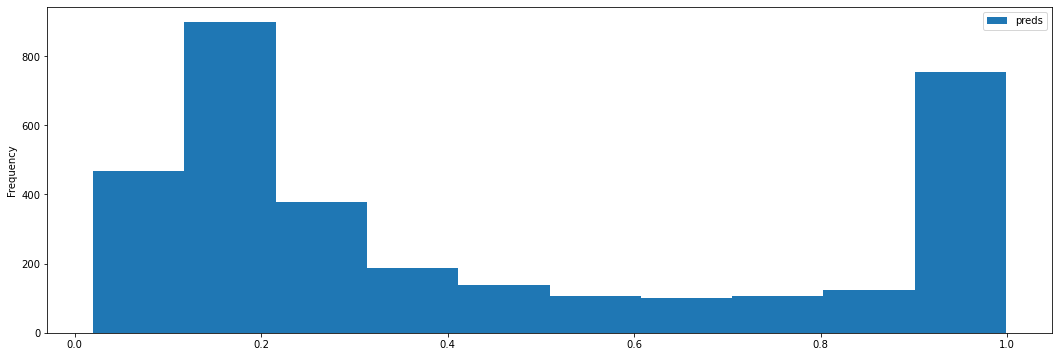

In [54]:
pred = pd.DataFrame(test_pred_BERT, columns=['preds'])
pred.plot.hist()

In [55]:
submission['target'] = test_pred_BERT_int
submission.to_csv('submission.csv', index=False, header=True)